# **Welcome to The Notebook**

### Task 1 - Setting up the project environment

Installing the needed modules

In [1]:
# %pip install google-generativeai

Importing the modules

In [2]:
import pandas as pd
import numpy as np
import os
import openai
from dotenv import load_dotenv
import json
import re
import google.generativeai as genai

import traceback


Setting up the OpenAI API:

1. Prepare a `.env` file to store the OpenAI API key.
2. Uploading the `.env` file to our colab environment
3. Load the API key and setup the API

Upload your `.env` file here

In [3]:
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
# print(GOOGLE_API_KEY)  # Just to verify it works; remove or hide this line for security.

Now let's load environment variables and get the API key

Let's setup our OpenAI API

### Task 2 - Craft Prompts to Communicate with the API

To communicate with the API we need to learn how to craft a prompt.

A prompt object contains two elements:
1. Role: Specifies the communicator's role—either `User`, `System`, or `Assistant`.
2. Content: Contains the text of the communication

example:
`prompt = {'role': 'user', 'content': 'what is the captial of Italy?'}`

Different Roles:

- **User**: Initiates the conversation, asks questions, and gives instructions to - the AI model.
- **System**: Sets the initial context or instructions for the conversation, guiding the AI's behavior.
- **Assistant**: Generates responses based on the user's queries and the context provided by the system, acting as the AI model's replies.

User initiates the conversation, system provides context, and assistant generates responses.


# gemini-pro-vision

In [4]:
# from PIL import Image

# model = genai.GenerativeModel('gemini-pro-vision')
# img = Image.open('challenge task\subplots.png')
# response = model.generate_content(["Describe this image", img])
# print(response.text)

In [5]:
# model = genai.GenerativeModel('gemini-pro')
# response = model.generate_content("Write a story about a robot.", stream=True)
# for chunk in response:
#     print(chunk.text, end='', flush=True)

In [6]:
# embedding_model = 'models/embedding-001'
# result = genai.embed_content(
#     model=embedding_model,
#     content="I'm Tom",
#     task_type="retrieval_document"
# )
# print(result['embedding'])

In [7]:
# from sklearn.metrics.pairwise import cosine_similarity

# # Assuming result['embedding'] is your first document embedding
# embedding1 = result['embedding']

# # Generate embedding for another document
# embedding2 = genai.embed_content(
#     model=embedding_model,
#     content="Generate Content Response",
#     task_type="retrieval_document"
# )['embedding']

# # Calculate cosine similarity
# similarity = cosine_similarity([embedding1], [embedding2])

# print(f"Similarity: {similarity[0][0]}")

In [8]:
# Calling the generate_content method on the model object.
# This method is expected to generate content based on the input prompt.
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(
    # The input prompt for the content generation. In this case, it's asking for a story about a magic backpack.
    "what is the captial of Italy?",
    # The generation_config parameter specifies various configuration options for the generation process.
    generation_config=genai.types.GenerationConfig(
        # candidate_count specifies the number of different outputs to generate for the given input.
        # Here, it's set to 1, meaning only one version of the story will be generated.
        candidate_count=1,
        # stop_sequences is a list of strings that, when generated, will signal the model to stop generating further content.
        # Here, the generation will stop if "x" is produced.
        # stop_sequences=["x"],
        # max_output_tokens specifies the maximum length of the generated content in terms of tokens.
        # A token can be a word or part of a word, so this doesn't directly translate to word count.
        max_output_tokens=500,
        # temperature controls the randomness of the output. A lower temperature results in less random completions.
        # Setting it to 0.7 strikes a balance between randomness and coherence.
        temperature=0.7,
    ),
)

response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "Rome"
              }
            ],
            "role": "model"
          },
          "finish_reason": "STOP",
          "index": 0,
          "safety_ratings": [
            {
              "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HATE_SPEECH",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HARASSMENT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
              "probability": "NEGLIGIBLE"
            }
          ]
        }
      ],
      "usage_metadata": {
        "prompt_token_count": 9,

In [9]:
# Define the system and user messages
system_message = "You are a professional Chef, provide the user with the vegetarian version of any dish and avoid extra elaborations."
user_message = "The main four ingredients of Beef Wellington."

# Create the chat
chat = model.start_chat(history=[
    {'role': 'user', 'parts': [system_message]},
    {'role': 'model', 'parts': ["Understood. I'll provide vegetarian versions of dishes and keep it concise."]}
])

# Generate the response
response = chat.send_message(user_message)

# Print the response
print(response.text)

1. Beef tenderloin
2. Pâté de foie gras
3. Puff pastry
4. Duxelles (mushrooms, shallots, herbs)


In [10]:
# Define the messages
system_message = "You are a professional Chef, provide the user with the vegetarian version of any dish and avoid extra elaborations."
user_message = "The main four ingredients of Beef Wellington."

# Generate the response
response = model.generate_content(
    [
        {"role": "user", "parts": [system_message]},
        {"role": "model", "parts": ["Understood. I'll provide vegetarian versions and keep it concise."]},
        {"role": "user", "parts": [user_message]}
    ],
    generation_config=genai.types.GenerationConfig(
    # stop_sequences=["3"],
    max_output_tokens=500,
    temperature=0.7,
    # top_p=0.9,
    # top_k=50,
    )
)

# Print the content
print(response.text)

1. Beef tenderloin
2. Pâté de foie gras
3. Puff pastry
4. Duxelles (mushrooms, shallots, thyme, garlic)

**Vegetarian version:**

1. Portobello mushroom
2. Vegetable pâté
3. Puff pastry
4. Duxelles (mushrooms, shallots, thyme, garlic)


In [11]:
# user =  {'role': 'user', 'content': 'what is the captial of Italy?'}

# model = genai.GenerativeModel('gemini-pro')
# # model = genai.GenerativeModel('gemini-1.5-flash')

# response = model.generate_content('what is the captial of Italy?')
# response
# # response = model.generate_content(
# #     messages=[user],  # List of messages (system and user)
# #     max_tokens=500  # Set a limit on the number of tokens in the response
# # )

### Task 3 - Generate and Execute python code

Define a function to generate a chat response using the OpenAI GPT-4 model, given system and user messages as input.

```python
def generate_chat_response(system_content, user_content):
    # Create two message dictionaries, one for the system and one for the user.
    system = {'role': 'system', 'content': system_content}
    user = {'role': 'user', 'content': user_content}

    # Use OpenAI's ChatCompletion API to generate a response.
    response = openai.ChatCompletion.create(
        model='gpt-4',
        messages=[system, user],  # List of messages (system and user)
        max_tokens=1200  # Set a limit on the number of tokens in the response
    )

    # Return the generated response.
    return response
```

In [12]:
def generate_chat_response(system_content, user_content):
    # Set up the model
    model = genai.GenerativeModel('gemini-pro')

    # Create the chat
    chat = model.start_chat(history=[
        {'role': 'user', 'parts': [system_content]},
        {'role': 'model', 'parts': ["Understood. I'll proceed as instructed."]}
    ])

    # Generate the response
    response = chat.send_message(user_content, generation_config=genai.types.GenerationConfig(
        max_output_tokens=1200  # Equivalent to max_tokens in OpenAI
    ))

    # Return the generated response
    return response

In [13]:
# # Example usage:
# system_content = "You are a helpful assistant."
# user_content = "What's the capital of France?"
# response = generate_chat_response(system_content, user_content)
# print(response.text)

Let's craft a prompt to generate a simple python method

In [14]:
system_content = "You are a python code generator, the user provides a task or a problem and you will generate python code to solve it, please ensure that the code is correct and executable and return only the code inside triple backticks (```)"
user_content = "generate a python method called 'check_odd_even' that gets a number and return if the number is odd or even."

response = generate_chat_response(system_content, user_content)
# content = response.choices[0].message.text
content = response.text
print(content)
# print(response.choices[0].message.text)

```python
def check_odd_even(number: int) -> str:
  """
  This function checks if the given number is odd or even.

  Args:
    number (int): The number to be checked.

  Returns:
    str: "Odd" if the number is odd, "Even" otherwise.
  """

  if number % 2 == 0:
    return "Even"
  else:
    return "Odd"
```


Let's extract the code from the prompt response

In [15]:
def extract_code(response_content):
    # Define a regular expression pattern to match text between triple backticks (```)
    pattern = r'```(.*?)```'

    # Use re.findall to find all non-overlapping matches of the pattern in the input string
    matches = re.findall(pattern, response_content, re.DOTALL)

    # Remove the python keyword from in the code and Return the first match found
    return matches[0].replace("python", "")

In [16]:
code = extract_code(content)

print(code)


def check_odd_even(number: int) -> str:
  """
  This function checks if the given number is odd or even.

  Args:
    number (int): The number to be checked.

  Returns:
    str: "Odd" if the number is odd, "Even" otherwise.
  """

  if number % 2 == 0:
    return "Even"
  else:
    return "Odd"



Now let's execute the generated code and use it

In [17]:
exec(code)
check_odd_even(5)

'Odd'

### Task 4 - Generate Python Code for Data Preparation

Defining `generate_code` helper method

```python
def generate_code(system_content, user_content):
    # Create two message dictionaries, one for the system and one for the user.
    system = {'role': 'system', 'content': system_content}
    user = {'role': 'user', 'content': user_content}

    # Use OpenAI's ChatCompletion API to generate a response.
    response = openai.ChatCompletion.create(
        model='gpt-4',
        messages=[system, user],  # List of messages (system and user)
        max_tokens=1200  # Set a limit on the number of tokens in the response
    )

    # Extract the response content
    response_content = response.choices[0].message.content

    # Define a regular expression pattern to match text between triple backticks (```)
    pattern = r'```(.*?)```'

    # Use re.findall to find all non-overlapping matches of the pattern in the input string
    matches = re.findall(pattern, response_content, re.DOTALL)

    # Remove the python keyword from in the code and Return the first match found
    return matches[0].replace("python", "")
    ```

In [18]:
def generate_code(system_content, user_content):
    # Set up the model
    model = genai.GenerativeModel('gemini-pro')

    # Create the chat
    chat = model.start_chat(history=[
        {'role': 'user', 'parts': [system_content]},
        {'role': 'model', 'parts': ["Understood. I'll proceed as instructed."]}
    ])

    # Generate the response
    response = chat.send_message(user_content, generation_config=genai.types.GenerationConfig(
        max_output_tokens=1200  # Equivalent to max_tokens in OpenAI
    ))

    response_content = response.text
    # Define a regular expression pattern to match text between triple backticks (```)
    pattern = r'```(.*?)```'

    # Use re.findall to find all non-overlapping matches of the pattern in the input string
    matches = re.findall(pattern, response_content, re.DOTALL)

    # Remove the python keyword from in the code and Return the first match found
    return matches[0].replace("python", "")

In [19]:
system_content = "You are a python code generator, the user provides a task or a problem and you will generate python code to solve it, please ensure that the code is correct and executable and return only the code inside triple backticks (```)"
user_content = "generate a python method that gets a number and return if the number is odd or even."

code = generate_code(system_content, user_content)

print(code)


def check_odd_even(number):
  """
  This function checks if the given number is odd or even.

  Args:
    number: The number to check.

  Returns:
    True if the number is odd, False otherwise.
  """

  return number % 2 != 0



Let's load product sales dataset

In [20]:
sales_data = pd.read_csv('product_sales_dataset.csv')

In [21]:
sales_data.head()

,Date,Product_Category,Product_Name,Product_Cost,Product_Price,Items_Sold
0,2018-01-01,Art & Crafts,Barrel O' Slime,1.99,3.99,281
1,2018-01-01,Art & Crafts,Etch A Sketch,10.99,20.99,42
2,2018-01-01,Art & Crafts,Kids Makeup Kit,13.99,19.99,39
3,2018-01-01,Art & Crafts,Magic Sand,13.99,15.99,128
4,2018-01-01,Art & Crafts,PlayDoh Can,1.99,2.99,145


In [22]:
sales_data.shape

(7782, 6)

In [23]:
sales_data.isnull().sum()

Date                0
Product_Category    0
Product_Name        0
Product_Cost        0
Product_Price       0
Items_Sold          0
dtype: int64

Let's check the data types in our dataset

In [24]:
sales_data.dtypes

Date                 object
Product_Category     object
Product_Name         object
Product_Cost        float64
Product_Price       float64
Items_Sold            int64
dtype: object

**Some Data Preparation**
* Extract month name from the `date` column
* Calculate profit per product


In [ ]:
system_content = "You are a python code generator, the user provides a task or a problem and you will generate python code to solve it, please ensure that the code is correct and executable and return only the code inside triple backticks (```)"
user_content = "Return a python method called 'get_month_names'. That gets a pandas series containing some dates with string data type. And returns a pandas series containing the month name of each date, don't use 'strftime'. "

code = generate_code(system_content, user_content)
print(code)

```python
import pandas as pd

def get_month_names(dates):
    """
    Gets a pandas series containing some dates with string data type.
    And returns a pandas series containing the month name of each date

    Args:
        dates (pd.Series): A pandas series containing dates with string data type.

    Returns:
        pd.Series: A pandas series containing the month name of each date.
    """

    # Convert the dates to datetime objects
    dates = pd.to_datetime(dates)

    # Extract the month name from each date
    month_names = dates.dt.month_name()

    # Return the month names
    return month_names
```

Let's execute this code

In [26]:
exec(code)
sales_data['Month_Name'] = get_month_names(sales_data.Date)

sales_data.head()

,Date,Product_Category,Product_Name,Product_Cost,Product_Price,Items_Sold,Month_Name
0,2018-01-01,Art & Crafts,Barrel O' Slime,1.99,3.99,281,01
1,2018-01-01,Art & Crafts,Etch A Sketch,10.99,20.99,42,01
2,2018-01-01,Art & Crafts,Kids Makeup Kit,13.99,19.99,39,01
3,2018-01-01,Art & Crafts,Magic Sand,13.99,15.99,128,01
4,2018-01-01,Art & Crafts,PlayDoh Can,1.99,2.99,145,01


Lets calculate profit per product

In [27]:
user_content = "Return a python method called 'add_product_profit' that gets a dataframe, product_cost, product_price and items_sold as input. Andit calculates the profit per product and append it as a new column called 'Product_Profit' to the dataframe. And it returns the dataframe."

code = generate_code(system_content, user_content)

print(code)


def add_product_profit(df, product_cost, product_price, items_sold):
  """Calculates the profit per product and appends it as a new column called 'Product_Profit' to the dataframe.

  Args:
    df: The dataframe to which the 'Product_Profit' column will be added.
    product_cost: The cost of each product.
    product_price: The price of each product.
    items_sold: The number of items sold for each product.

  Returns:
    The dataframe with the 'Product_Profit' column added.
  """

  # Calculate the profit per product.
  profit_per_product = product_price - product_cost

  # Add the 'Product_Profit' column to the dataframe.
  df['Product_Profit'] = profit_per_product * items_sold

  # Return the dataframe.
  return df



```python
def calculate_product_profit(df, product_cost, product_price, items_sold):
  """Calculates the profit per product and appends it as a new column called 'Product_Profit' to the dataframe.

  Args:
    df: The dataframe to which the 'Product_Profit' column will be appended.
    product_cost: The cost of each product.
    product_price: The price of each product.
    items_sold: The number of items sold for each product.

  Returns:
    The dataframe with the 'Product_Profit' column appended.
  """

  # Calculate the profit per product.
  df['Product_Profit'] = (product_price - product_cost) * items_sold

  # Return the dataframe with the 'Product_Profit' column appended.
  return df
```

Now let's execute this code and use it.

In [28]:
exec(code)
sales_data = add_product_profit(sales_data, sales_data.Product_Cost, sales_data.Product_Price, sales_data.Items_Sold)
sales_data.head()

,Date,Product_Category,Product_Name,Product_Cost,Product_Price,Items_Sold,Month_Name,Product_Profit
0,2018-01-01,Art & Crafts,Barrel O' Slime,1.99,3.99,281,01,562.0
1,2018-01-01,Art & Crafts,Etch A Sketch,10.99,20.99,42,01,420.0
2,2018-01-01,Art & Crafts,Kids Makeup Kit,13.99,19.99,39,01,234.0
3,2018-01-01,Art & Crafts,Magic Sand,13.99,15.99,128,01,256.0
4,2018-01-01,Art & Crafts,PlayDoh Can,1.99,2.99,145,01,145.0


### Task 5 - Generate Python Code for Data Visualization

Defining some helper functions

In [29]:
def generate_chat_response(system_content, user_content):
    # Set up the model
    model = genai.GenerativeModel('gemini-pro')
    # model = genai.GenerativeModel('gemini-1.5-flash')

    # Create the chat
    chat = model.start_chat(history=[
        {'role': 'user', 'parts': [system_content]},
        {'role': 'model', 'parts': ["Understood. I'll proceed as instructed."]}
    ])

    # Generate the response
    response = chat.send_message(user_content, generation_config=genai.types.GenerationConfig(
        max_output_tokens=1200  # Equivalent to max_tokens in OpenAI
    ))

    # Return the generated response
    return response


def extract_code(response_content):
    # Define a regular expression pattern to match text between triple backticks (```)
    pattern = r'```(.*?)```'

    # Use re.findall to find all non-overlapping matches of the pattern in the input string
    matches = re.findall(pattern, response_content, re.DOTALL)

    # Remove the python keyword from in the code and Return the first match found
    return matches[0].replace("python", "")



In [30]:
def generate_code_and_execute(user_content, max_retries=3, execute=True):
    system_content = """
    You are a python code generator. You know pandas. You answer to every question with Python code.
    You return python code wrapped in ``` delimiter. Import any needed python module. And you don't provide any elaborations.
    """

    for attempt in range(max_retries):
        try:
            # Generate chat response
            response = generate_chat_response(system_content, user_content)
            response_content = response.text

            # Extract the code from the response content
            code = extract_code(response_content)

            if execute:
                # Execute the generated Python code
                exec(code, globals())
            
            return code  # Return the successful code

        except Exception as e:
            error_message = f"Error in attempt {attempt + 1}: {str(e)}\n{traceback.format_exc()}"
            print(error_message)

            if attempt < max_retries - 1:
                # If not the last attempt, update the user_content to ask for a fix
                user_content = f"""
                The previous code generated had an error. Please provide a corrected version.
                Error details:
                {error_message}
                Original request:
                {user_content}
                """
            else:
                print(f"Failed to generate valid code after {max_retries} attempts.")
                return None  # Or you could raise an exception here

    return None  # This line will be reached if all attempts fail

In [31]:
result = generate_code_and_execute("Create a pandas DataFrame with sample data, but make an typo error in DataFrame method, use it as datafram", max_retries=3, execute=True)
if result:
    print("Successfully generated and executed code:")
    print(result)
else:
    print("Failed to generate valid code.")

Successfully generated and executed code:

import pandas as pd

data = {
    'name': ['John', 'Mary', 'Peter'],
    'age': [20, 25, 30]
}

datafram = pd.DataFrame(data)  # Typo in 'DataFrame'



In [32]:
print(result)


import pandas as pd

data = {
    'name': ['John', 'Mary', 'Peter'],
    'age': [20, 25, 30]
}

datafram = pd.DataFrame(data)  # Typo in 'DataFrame'



In [33]:
def update_code(code, user_content, max_retries=3, execute=True, verbose=True):
    system_content = f"""
    You are a python code generator. You know pandas. You are given the following python method: {code}. Update the code based on the user content. Do not change the method name.
    You return the updated python code wrapped in ``` delimiter. And you don't provide any elaborations.
    """
    for attempt in range(max_retries):
        try:
            response = generate_chat_response(system_content, user_content)
            new_code = extract_code(response.text)

            if not new_code:
                raise ValueError("No code was generated")

            if execute:
                exec(new_code, globals())
            
            if verbose:
                print(f"Successfully updated and executed code on attempt {attempt + 1}")
            return new_code  # Return the successful code

        except Exception as e:
            error_message = f"Error in attempt {attempt + 1}: {str(e)}\n{traceback.format_exc()}"
            if verbose:
                print(error_message)

            if attempt < max_retries - 1:
                user_content = f"""
                The previous code update had an error. Please provide a corrected version.
                Original code:
                {code}
                Error details:
                {error_message}
                Update request:
                {user_content}
                """
            elif verbose:
                print(f"Failed to generate valid code after {max_retries} attempts.")

    return None  # This line will be reached if all attempts fail

In [34]:
# def test_update_code():
#     original_code = """
# def hello_world():
#     print("Hello, World!")
# """
#     update_request = "Modify the function to take a name parameter and print a personalized greeting"

#     print("Original code:")
#     print(original_code)
#     print("\nUpdate request:")
#     print(update_request)
#     print("\nAttempting to update code...")

#     updated_code = update_code(original_code, update_request, max_retries=3, execute=True, verbose=True)

#     if updated_code:
#         print("\nFinal updated code:")
#         print(updated_code)
#         print("\nTesting the updated function:")
#         try:
#             # This will work if the function was updated correctly
#             hello_world("Alice")
#         except Exception as e:
#             print(f"Error when trying to use the updated function: {str(e)}")
#     else:
#         print("Failed to update the code.")

# # Run the test
# test_update_code()

In [35]:
new_result = update_code(result, "dont fix it")
if new_result:
    print("Successfully generated and executed code:")
    print(new_result)
else:
    print("Failed to generate valid code.")

Successfully updated and executed code on attempt 1
Successfully generated and executed code:

import pandas as pd

data = {
    'name': ['John', 'Mary', 'Peter'],
    'age': [20, 25, 30]
}

datafram = pd.DataFrame(data)  # Typo in 'DataFrame'



Let's check our data again

In [36]:
sales_data

,Date,Product_Category,Product_Name,Product_Cost,Product_Price,Items_Sold,Month_Name,Product_Profit
0,2018-01-01,Art & Crafts,Barrel O' Slime,1.99,3.99,281,01,562.0
1,2018-01-01,Art & Crafts,Etch A Sketch,10.99,20.99,42,01,420.0
2,2018-01-01,Art & Crafts,Kids Makeup Kit,13.99,19.99,39,01,234.0
3,2018-01-01,Art & Crafts,Magic Sand,13.99,15.99,128,01,256.0
4,2018-01-01,Art & Crafts,PlayDoh Can,1.99,2.99,145,01,145.0
...,...,...,...,...,...,...,...,...
7777,2018-09-30,Toys,Dinosaur Figures,10.99,14.99,29,09,116.0
7778,2018-09-30,Toys,Hot Wheels 5-Pack,3.99,5.99,115,09,230.0
7779,2018-09-30,Toys,Lego Bricks,34.99,39.99,164,09,820.0
7780,2018-09-30,Toys,Mr. Potatohead,4.99,9.99,13,09,65.0



**Question 1-** How does the daily `average` profit change over time?

Steps to answer this question:

1. Aggregate our data to have average `Product_Profit` per day.
2. Draw a line chart to visualize the data


In [37]:
user_content = "Return a python method called plot_average_profit_per_day that gets a dataframe, aggregate the dataframe based on 'Date' column and calculates the average 'Product_Profit', then draws a line chart to visualize how the average daily profit changes over time. Use seaborn module, and import all needed modules"

code = generate_code_and_execute(user_content)

print(code)


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_average_profit_per_day(df):
    # Group the data by date and calculate the average profit for each day
    df = df.groupby('Date')['Product_Profit'].mean().reset_index()

    # Create a line chart to visualize the average profit over time
    sns.lineplot(data=df, x='Date', y='Product_Profit')
    plt.title('Average Profit per Day')
    plt.xlabel('Date')
    plt.ylabel('Profit')
    plt.show()



```python
import seaborn as sns

def plot_average_profit_per_day(df):
    df_avg_profit = df.groupby('Date')['Product_Profit'].mean().reset_index()
    sns.lineplot(data=df_avg_profit, x='Date', y='Product_Profit')
```

Let's use the generated method

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


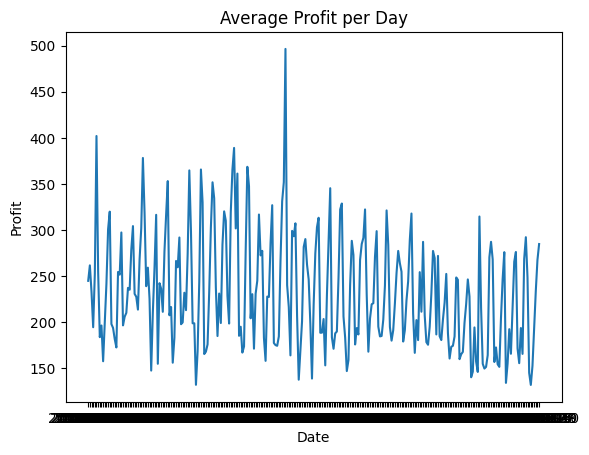

In [38]:
plot_average_profit_per_day(sales_data)

What if we want to update the generated visualization?

In [39]:
user_content = "change the line color to orange. And reduce the line thickness to 1. And make the figure 15*6, and don't forget to import the needed modules"
# user_content = "change the line color to orange. And reduce the line thickness"

new_code = update_code(code, user_content)

print(new_code)

Successfully updated and executed code on attempt 1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_average_profit_per_day(df):
    # Group the data by date and calculate the average profit for each day
    df = df.groupby('Date')['Product_Profit'].mean().reset_index()

    # Create a line chart to visualize the average profit over time
    sns.set_theme()
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.lineplot(data=df, x='Date', y='Product_Profit', ax=ax, color='orange', linewidth=1)
    plt.title('Average Profit per Day')
    plt.xlabel('Date')
    plt.ylabel('Profit')
    plt.show()



```python
import seaborn as sns

def plot_average_profit_per_day(df):
    df_avg_profit = df.groupby('Date')['Product_Profit'].mean().reset_index()
    sns.lineplot(data=df_avg_profit, x='Date', y='Product_Profit', color='orange', linewidth=1)
```

```python
import seaborn as sns
import matplotlib.pyplot as plt

def plot_average_profit_per_day(df):
    df_avg_profit = df.groupby('Date')['Product_Profit'].mean().reset_index()
    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.lineplot(data=df_avg_profit, x='Date', y='Product_Profit', color='orange', linewidth=1, ax=ax)
    plt.show()
```

Running the new code

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


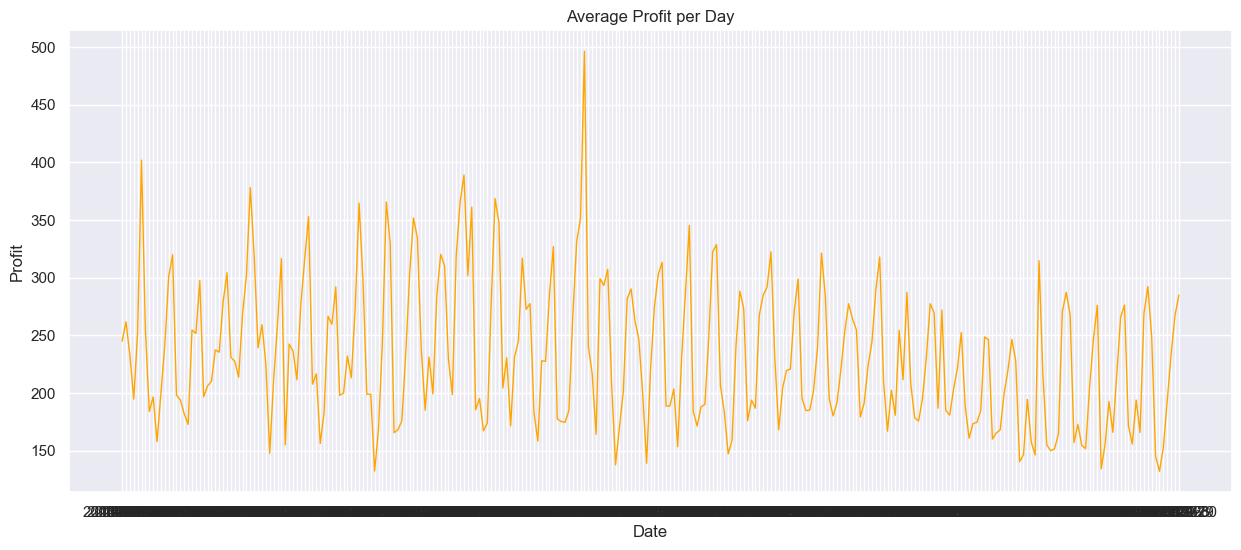

In [40]:
plot_average_profit_per_day(sales_data)

In [41]:
user_content = "make it clean white background, and add title"
# user_content = "change the line color to orange. And reduce the line thickness"

new_code2 = update_code(new_code, user_content)

print(new_code2)

Successfully updated and executed code on attempt 1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_average_profit_per_day(df):
    # Group the data by date and calculate the average profit for each day
    df = df.groupby('Date')['Product_Profit'].mean().reset_index()

    # Create a line chart to visualize the average profit over time
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.set_theme(style="whitegrid", palette="Set3")
    sns.lineplot(data=df, x='Date', y='Product_Profit', ax=ax, color='orange', linewidth=1)
    plt.title('Average Profit per Day')
    plt.xlabel('Date')
    plt.ylabel('Profit')
    plt.show()



c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


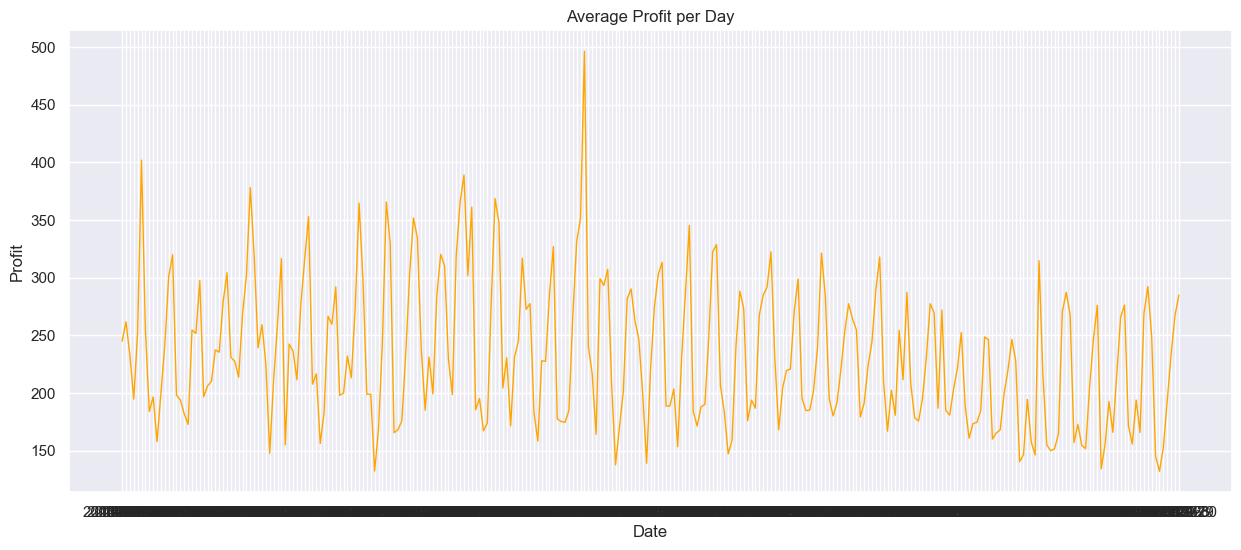

In [42]:
plot_average_profit_per_day(sales_data)

**Execrise:** Question 2 - Create a barchart visualization to show total average profit per Product Category.

In [43]:
user_content = "Return a python method called total_average_profit_per_Product_Category that gets a dataframe, aggregate the dataframe based on 'Product_Category' column and calculates the total average 'Product_Profit' for each 'Product_Category', then draws a barchart to visualize how the total average profit per Product Category changes. Use seaborn module"

code = generate_code_and_execute(user_content)

print(code)


def total_average_profit_per_Product_Category(df):
    import seaborn as sns
    import matplotlib.pyplot as plt
    df_grouped = df.groupby('Product_Category').agg({'Product_Profit': 'mean'})
    df_grouped.reset_index(inplace=True)
    sns.barplot(data=df_grouped, x='Product_Category', y='Product_Profit')
    plt.xlabel('Product Category')
    plt.ylabel('Total Average Profit')
    plt.title('Total Average Profit per Product Category')
    plt.show()
    return df_grouped



```python
import pandas as pd
import seaborn as sns

def total_average_profit_per_Product_Category(df):
    """
    This function aggregates the dataframe based on 'Product_Category' column and calculates the total average 'Product_Profit' for each 'Product_Category', then draws a barchart to visualize how the total average profit per Product Category changes.

    Args:
        df (pandas.DataFrame): The dataframe to be aggregated.

    Returns:
        None
    """

    # Group the dataframe by 'Product_Category' and calculate the total average 'Product_Profit' for each 'Product_Category'.
    df = df.groupby('Product_Category')['Product_Profit'].mean().reset_index()

    # Draw a barchart to visualize how the total average profit per Product Category changes.
    sns.barplot(data=df, x='Product_Category', y='Product_Profit')
    plt.xlabel('Product Category')
    plt.ylabel('Total Average Profit')
    plt.title('Total Average Profit per Product Category')
    plt.show()
```

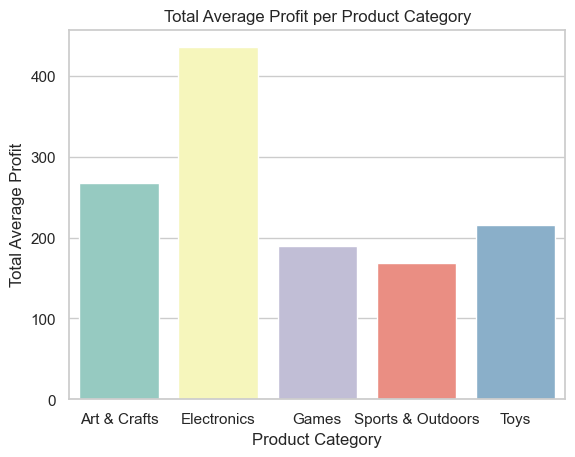

,Product_Category,Product_Profit
0,Art & Crafts,267.337229
1,Electronics,435.459387
2,Games,189.252241
3,Sports & Outdoors,168.929919
4,Toys,215.037934


In [44]:
total_average_profit_per_Product_Category(sales_data)

Updating the code to have bar chart with different bar color per product category.

In [45]:
user_content = "make the chart bigger."

new_code = update_code(code, user_content)

print(new_code)

Successfully updated and executed code on attempt 1

def total_average_profit_per_Product_Category(df):
    import seaborn as sns
    import matplotlib.pyplot as plt
    df_grouped = df.groupby('Product_Category').agg({'Product_Profit': 'mean'})
    df_grouped.reset_index(inplace=True)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.barplot(data=df_grouped, x='Product_Category', y='Product_Profit')
    plt.xlabel('Product Category')
    plt.ylabel('Total Average Profit')
    plt.title('Total Average Profit per Product Category')
    plt.show()
    return df_grouped



```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def total_average_profit_per_Product_Category(df):
    """
    This function aggregates the dataframe based on 'Product_Category' column and calculates the total average 'Product_Profit' for each 'Product_Category', then draws a barchart to visualize how the total average profit per Product Category changes.

    Args:
        df (pandas.DataFrame): The dataframe to be aggregated.

    Returns:
        None
    """

    # Group the dataframe by 'Product_Category' and calculate the total average 'Product_Profit' for each 'Product_Category'.
    df = df.groupby('Product_Category')['Product_Profit'].mean().reset_index()

    # Draw a barchart to visualize how the total average profit per Product Category changes.
    sns.set(rc={'figure.figsize':(20,10)})
    sns.barplot(data=df, x='Product_Category', y='Product_Profit')
    plt.xlabel('Product Category')
    plt.ylabel('Total Average Profit')
    plt.title('Total Average Profit per Product Category')
    plt.show()

```

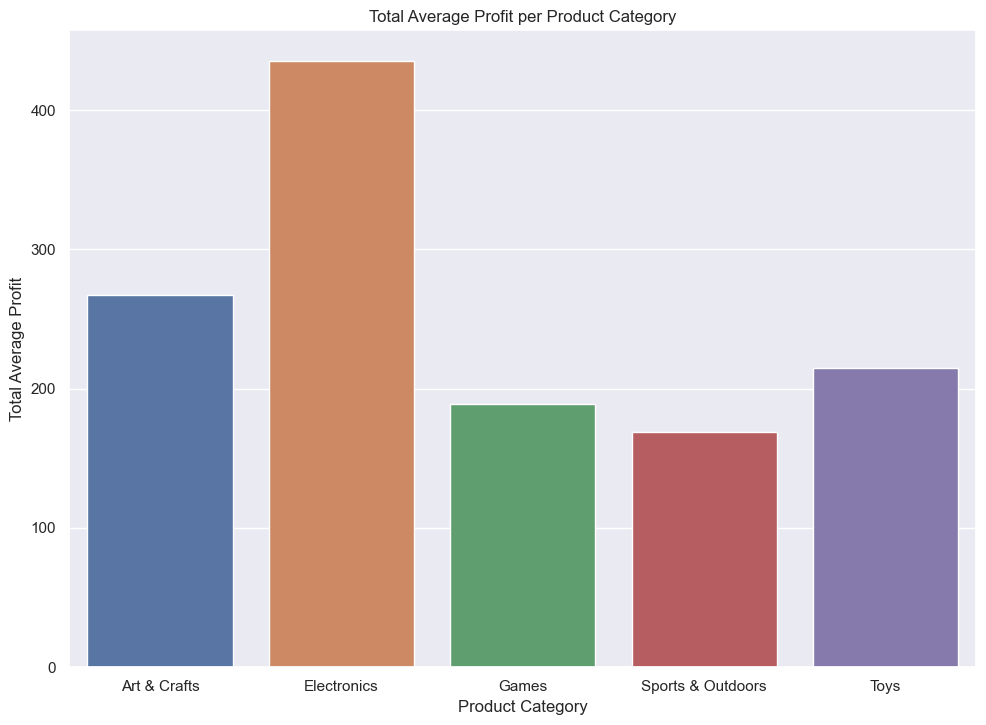

,Product_Category,Product_Profit
0,Art & Crafts,267.337229
1,Electronics,435.459387
2,Games,189.252241
3,Sports & Outdoors,168.929919
4,Toys,215.037934


In [46]:
total_average_profit_per_Product_Category(sales_data)

### Task 6 - Create Visualizations using AI

Let's checkout the data again

In [47]:
sales_data

,Date,Product_Category,Product_Name,Product_Cost,Product_Price,Items_Sold,Month_Name,Product_Profit
0,2018-01-01,Art & Crafts,Barrel O' Slime,1.99,3.99,281,01,562.0
1,2018-01-01,Art & Crafts,Etch A Sketch,10.99,20.99,42,01,420.0
2,2018-01-01,Art & Crafts,Kids Makeup Kit,13.99,19.99,39,01,234.0
3,2018-01-01,Art & Crafts,Magic Sand,13.99,15.99,128,01,256.0
4,2018-01-01,Art & Crafts,PlayDoh Can,1.99,2.99,145,01,145.0
...,...,...,...,...,...,...,...,...
7777,2018-09-30,Toys,Dinosaur Figures,10.99,14.99,29,09,116.0
7778,2018-09-30,Toys,Hot Wheels 5-Pack,3.99,5.99,115,09,230.0
7779,2018-09-30,Toys,Lego Bricks,34.99,39.99,164,09,820.0
7780,2018-09-30,Toys,Mr. Potatohead,4.99,9.99,13,09,65.0


**Question 3** - Which product has the highest total sold items?

In [48]:
user_content =  """
                    Return a python method called product_total_sold_items that gets a dataframe, 
                    aggregate the dataframe based on 'Product_Name' column and calculates the 
                    total sold items 'Items_Sold' for each 'Product_Name', then draws a barchart 
                    to visualize products' total sold items. Use seaborn module"
                """
code = generate_code_and_execute(user_content)

print(code)


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def product_total_sold_items(df):
    # Group the dataframe by 'Product_Name' and calculate the sum of 'Items_Sold'
    total_sold_items = df.groupby('Product_Name')['Items_Sold'].sum()

    # Reset the index to convert the Series to a DataFrame
    total_sold_items = total_sold_items.reset_index()

    # Draw a bar chart to visualize products' total sold items
    sns.barplot(data=total_sold_items, x='Product_Name', y='Items_Sold')
    plt.xticks(rotation=45)
    plt.xlabel('Product Name')
    plt.ylabel('Total Items Sold')
    plt.title('Total Sold Items by Product')
    plt.show()

    return total_sold_items



```python

import pandas as pd
import seaborn as sns

def product_total_sold_items(df):
    # Group the dataframe by 'Product_Name' and calculate the total 'Items_Sold' for each product
    total_sold_items = df.groupby('Product_Name')['Items_Sold'].sum().reset_index()

    # Draw a bar chart to visualize products' total sold items
    sns.barplot(data=total_sold_items, x='Product_Name', y='Items_Sold')
    plt.xlabel('Product Name')
    plt.ylabel('Total Items Sold')
    plt.title('Total Sold Items for Each Product')
    plt.xticks(rotation=45)
    plt.show()

```

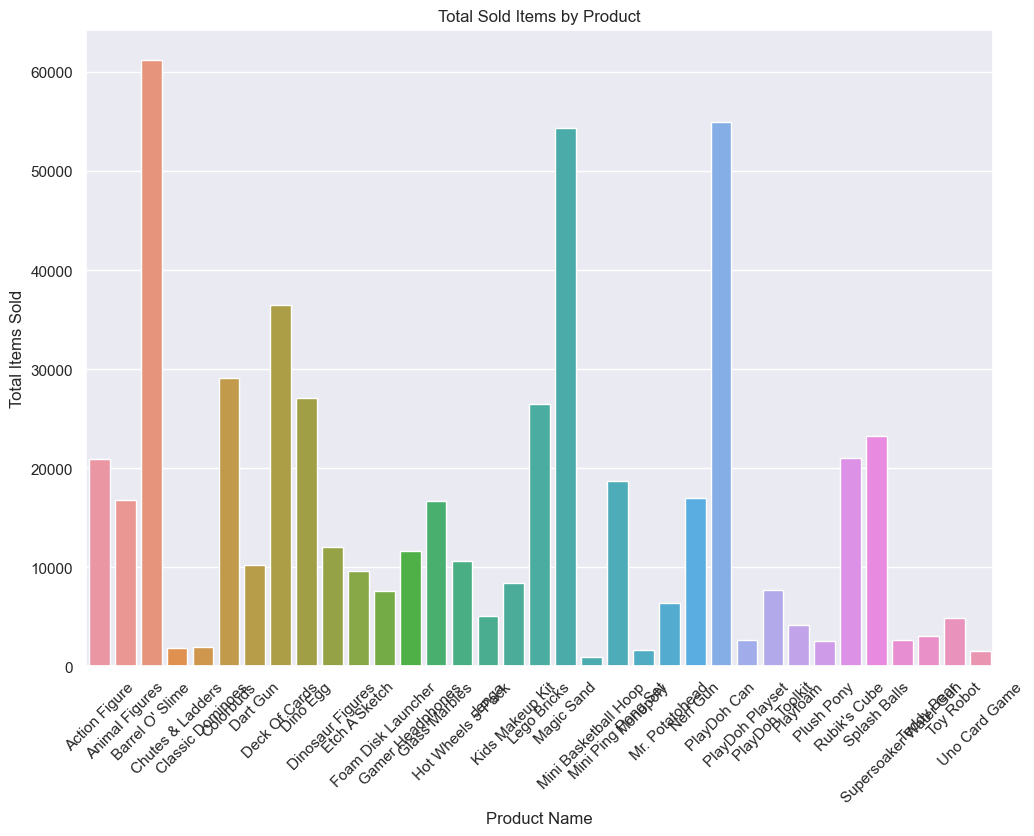

,Product_Name,Items_Sold
0,Action Figure,20923
1,Animal Figures,16809
2,Barrel O' Slime,61232
3,Chutes & Ladders,1897
4,Classic Dominoes,1951
5,Colorbuds,29156
6,Dart Gun,10248
7,Deck Of Cards,36484
8,Dino Egg,27111
9,Dinosaur Figures,12028


In [49]:
product_total_sold_items(sales_data)

Let's make it a horizontal bar chart and highlight the prodcut with the highest number of sold items.

In [52]:
user_content = "make it a horizontal bar chart, sort them, and highlight the prodcut with the highest number of sold items."

new_code = update_code(code, user_content)

print(new_code)

Successfully updated and executed code on attempt 1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def product_total_sold_items(df):
    # Group the dataframe by 'Product_Name' and calculate the sum of 'Items_Sold'
    total_sold_items = df.groupby('Product_Name')['Items_Sold'].sum()

    # Reset the index to convert the Series to a DataFrame
    total_sold_items = total_sold_items.reset_index()

    # Sort the dataframe by 'Items_Sold' in descending order
    total_sold_items = total_sold_items.sort_values(by='Items_Sold', ascending=False)

    # Draw a horizontal bar chart to visualize products' total sold items
    sns.barplot(data=total_sold_items, y='Product_Name', x='Items_Sold', orient='h')
    plt.xlabel('Total Items Sold')
    plt.ylabel('Product Name')
    plt.title('Total Sold Items by Product')

    # Highlight the product with the highest number of sold items
    max_items_sold = total_sold_items['Items_Sold'].max()
    highest_selling_product 

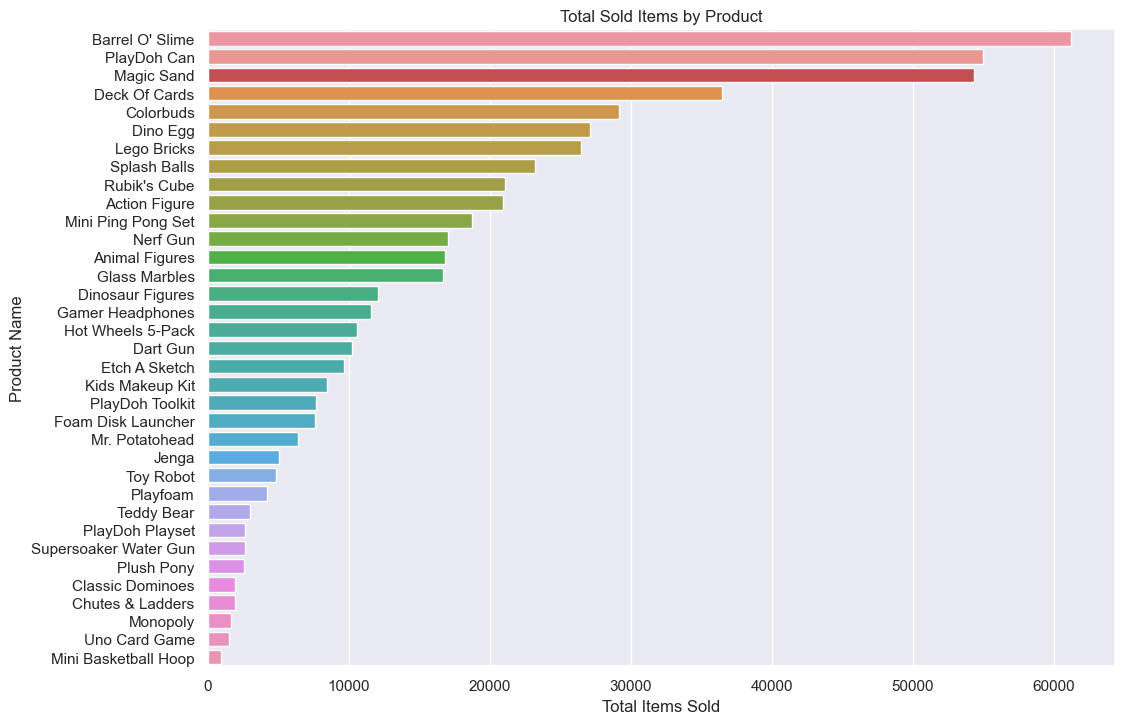

,Product_Name,Items_Sold
2,Barrel O' Slime,61232
24,PlayDoh Can,54943
18,Magic Sand,54337
7,Deck Of Cards,36484
5,Colorbuds,29156
8,Dino Egg,27111
17,Lego Bricks,26446
30,Splash Balls,23208
29,Rubik's Cube,21048
0,Action Figure,20923


In [53]:
product_total_sold_items(sales_data)